# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [6]:
sets=[]
for i in range(0,len(cities),50):
    set=(cities[i:i+50])
    sets.append(set)

In [13]:
name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
print("Beginning Data Retrieval")
print("-"*30)
for city in sets:
    for city_name in city:
        try:
            query_url = url + "appid=" + weather_api_key + "&q=" + city_name
            response = requests.get(query_url).json()
            cloudiness.append(response["clouds"]["all"])
            humidity.append(response["main"]["humidity"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            max_temp.append((response["main"]["temp_max"]-273.15)*9/5 + 32)
            wind_speed.append(response["wind"]["speed"])
            name.append(response["name"])
            print(f"Processing Record {city.index(city_name)+1} of set {sets.index(city)+1}| {city_name}")
        except:
            print("City not found. Skipping...")
            pass
print("-"*30)
print("Data Retrieval Complete")
print("-"*30)

Beginning Data Retrieval
------------------------------
Processing Record 1 of set 1| nome
Processing Record 2 of set 1| olafsvik
Processing Record 3 of set 1| beringovskiy
Processing Record 4 of set 1| port keats
Processing Record 5 of set 1| san patricio
Processing Record 6 of set 1| avarua
Processing Record 7 of set 1| rikitea
City not found. Skipping...
Processing Record 9 of set 1| esperance
Processing Record 10 of set 1| zhezkazgan
Processing Record 11 of set 1| lachi
Processing Record 12 of set 1| hobart
City not found. Skipping...
Processing Record 14 of set 1| maceio
Processing Record 15 of set 1| cape town
Processing Record 16 of set 1| brookhaven
Processing Record 17 of set 1| wilmington
Processing Record 18 of set 1| poum
Processing Record 19 of set 1| mataura
Processing Record 20 of set 1| puro
Processing Record 21 of set 1| moindou
Processing Record 22 of set 1| iqaluit
Processing Record 23 of set 1| mounana
Processing Record 24 of set 1| kodiak
Processing Record 25 of se

Processing Record 8 of set 5| saint george
Processing Record 9 of set 5| tual
City not found. Skipping...
Processing Record 11 of set 5| praia da vitoria
Processing Record 12 of set 5| hervey bay
Processing Record 13 of set 5| ornes
Processing Record 14 of set 5| khani
Processing Record 15 of set 5| praya
Processing Record 16 of set 5| wenling
Processing Record 17 of set 5| katsuura
Processing Record 18 of set 5| gazanjyk
City not found. Skipping...
Processing Record 20 of set 5| virginia beach
Processing Record 21 of set 5| laredo
City not found. Skipping...
Processing Record 23 of set 5| lavrentiya
Processing Record 24 of set 5| yilan
Processing Record 25 of set 5| hobyo
Processing Record 26 of set 5| shimoda
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of set 5| osypenko
Processing Record 30 of set 5| sao miguel do araguaia
Processing Record 31 of set 5| alofi
Processing Record 32 of set 5| moctezuma
Processing Record 33 of set 5| la asuncion
Processi

Processing Record 18 of set 9| imeni karla libknekhta
Processing Record 19 of set 9| bosaso
Processing Record 20 of set 9| waverly
Processing Record 21 of set 9| pascagoula
Processing Record 22 of set 9| greytown
Processing Record 23 of set 9| fairbanks
Processing Record 24 of set 9| namatanai
Processing Record 25 of set 9| bukene
Processing Record 26 of set 9| muros
Processing Record 27 of set 9| mehamn
Processing Record 28 of set 9| waldoboro
Processing Record 29 of set 9| aswan
Processing Record 30 of set 9| adre
Processing Record 31 of set 9| harstad
City not found. Skipping...
Processing Record 33 of set 9| jasper
Processing Record 34 of set 9| jiwani
Processing Record 35 of set 9| chernyshevskiy
Processing Record 36 of set 9| dongsheng
Processing Record 37 of set 9| waipawa
Processing Record 38 of set 9| san cristobal
Processing Record 39 of set 9| basco
Processing Record 40 of set 9| catamarca
Processing Record 41 of set 9| turukhansk
Processing Record 42 of set 9| almaznyy
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
data_df=pd.DataFrame(
{
    "City":name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}
)
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nome,90,US,1578793155,85,64.50,-165.41,17.006,11.30
1,Olafsvik,67,IS,1578793155,63,64.89,-23.71,28.670,6.75
2,Beringovskiy,100,RU,1578793155,86,63.05,179.32,31.496,11.48
3,Port Keats,100,AU,1578793155,74,-14.25,129.55,83.174,1.43
4,San Patricio,40,MX,1578793155,74,19.22,-104.70,82.400,1.05


In [15]:
data_df.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [15]:
data_df.to_csv("result/Weather result.csv",index=False,encoding="UTF-8",header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

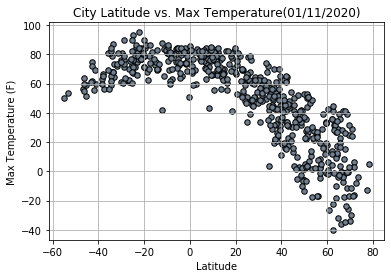

In [16]:
plt.scatter(lat,max_temp,marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("City Latitude vs. Max Temperature(01/11/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("result/weather1.png")

#### Latitude vs. Humidity Plot

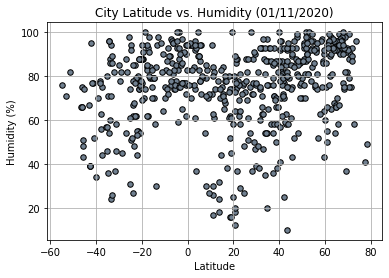

In [29]:
plt.scatter(lat,humidity,marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("City Latitude vs. Humidity (01/11/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("result/weather2.png")

#### Latitude vs. Cloudiness Plot

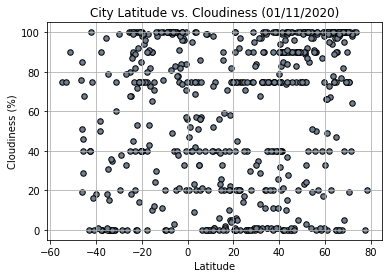

In [30]:
plt.scatter(lat,cloudiness,marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("City Latitude vs. Cloudiness (01/11/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("result/weather3.png")

#### Latitude vs. Wind Speed Plot

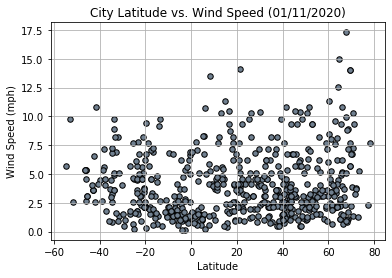

In [31]:
plt.scatter(lat,wind_speed,marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("City Latitude vs. Wind Speed (01/11/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("result/weather4.png")

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y,loc_x,loc_y):
    slope,intercept,rvalue,pvalue,stderr=linregress(x,y)
    regression_values=x*slope+intercept
    line_eq=f"y={round(slope,2)}x+{round(intercept,2)}"
    print(f"The r-squared is: {rvalue}")
    plt.plot(x,regression_values,'r-')
    plt.annotate(line_eq,(loc_x,loc_y),fontsize=15,color="red")

In [19]:
# Create Northern and Southern Hemisphere DataFrames
north_df=data_df.loc[data_df["Lat"]>0]
south_df=data_df.loc[data_df["Lat"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8328411170659071


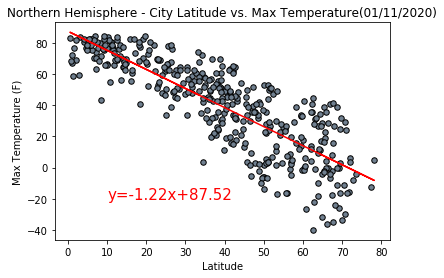

In [21]:
plt.scatter(north_df["Lat"],north_df["Max Temp"],marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature(01/11/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
linear_regression(north_df["Lat"],north_df["Max Temp"],10,-20)

plt.savefig("result/weather5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.424920195140927


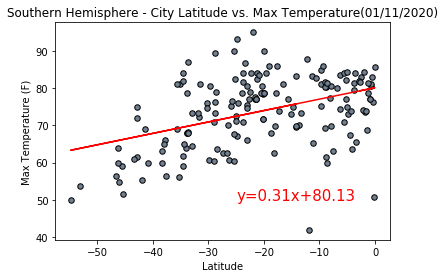

In [23]:
plt.scatter(south_df["Lat"],south_df["Max Temp"],marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature(01/11/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
linear_regression(south_df["Lat"],south_df["Max Temp"],-25,50)

plt.savefig("result/weather6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.28280401721373133


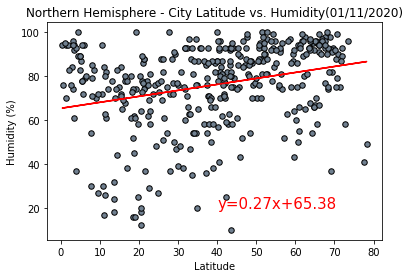

In [57]:
plt.scatter(north_df["Lat"],north_df["Humidity"],marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("Northern Hemisphere - City Latitude vs. Humidity(01/11/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
linear_regression(north_df["Lat"],north_df["Humidity"],40,20)

plt.savefig("result/weather7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.41615757531067454


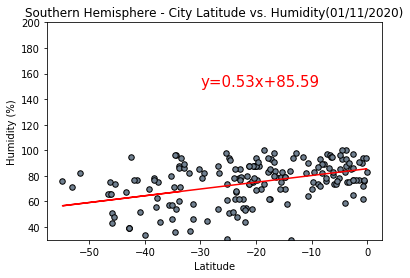

In [62]:
plt.scatter(south_df["Lat"],south_df["Humidity"],marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("Southern Hemisphere - City Latitude vs. Humidity(01/11/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(30,200)
linear_regression(south_df["Lat"],south_df["Humidity"],-30,150)

plt.savefig("result/weather8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.34532677263496214


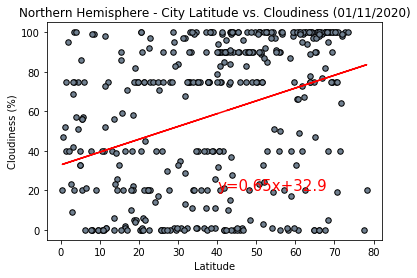

In [63]:
plt.scatter(north_df["Lat"],north_df["Cloudiness"],marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (01/11/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
linear_regression(north_df["Lat"],north_df["Cloudiness"],40,20)

plt.savefig("result/weather9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3539189778951492


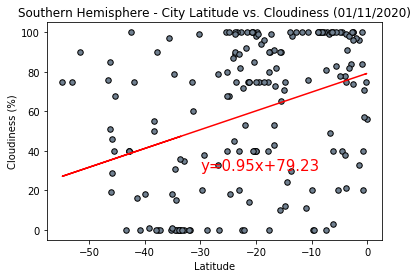

In [64]:
plt.scatter(south_df["Lat"],south_df["Cloudiness"],marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (01/11/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
linear_regression(south_df["Lat"],south_df["Cloudiness"],-30,30)

plt.savefig("result/weather10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10570104342170089


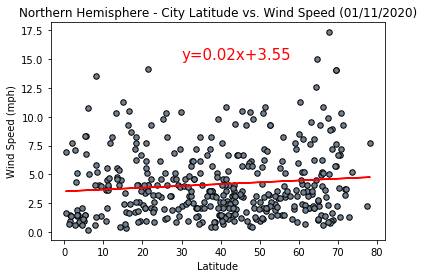

In [66]:
plt.scatter(north_df["Lat"],north_df["Wind Speed"],marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (01/11/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
linear_regression(north_df["Lat"],north_df["Wind Speed"],30,15)

plt.savefig("result/weather11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.30832119630839805


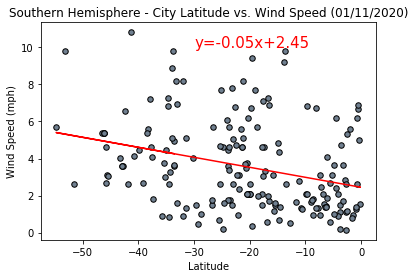

In [68]:
plt.scatter(south_df["Lat"],south_df["Wind Speed"],marker="o",facecolors="slategrey",edgecolors="black",s=30)
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (01/11/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
linear_regression(south_df["Lat"],south_df["Wind Speed"],-30,10)

plt.savefig("result/weather12.png")

Observations:
 - There's a strong relationship between latitue and maximum temperature: The maximum temperature declines as the latidute increases in the nothern hemisphere and vice versa for the southern hemisphere. The correlation is stronger in the nothern hemisphere as it has a higher r-squared value. Probably because there are more cities in the southern hemisphere with a higher latitude location, so we can't see as clear trend as we see in the nother hemisphere.
 - The dataset did not exhibit a clear relationship between the latitude and cloudiness/ wind speed for both hemispheres as the data was spread out and the r-squared values are small.
 - The data indicates that the higher latitude, the higher humidity we get. But the conclusion is not reliable since there are many other factors. Latitude is most likely a stronger factor of the max temperature for cities only.